## Project Title
AI Echo: Your Smartest Conversational Partner



## Skills take away From This Project
Data Preprocessing & NLP Techniques 

Exploratory Data Analysis (EDA)

Machine Learning & Deep Learning Models

Model Evaluation Metrics

Deployment & Visualization





In [1]:
import pandas as pd

### Read CSV File

In [2]:
df = pd.read_csv(r"C:\Users\Vignesh\Downloads\chatgpt_style_reviews_dataset.xlsx - Sheet1.csv")


### Data Inspecting

In [3]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [4]:
df.shape

(250, 12)

In [5]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [6]:
df.describe()

,rating,helpful_votes,review_length
count,250.000000,250.000000,250.000000
mean,2.980000,94.416000,20.852000
std,1.465671,57.020842,3.459185
min,1.000000,0.000000,13.000000
25%,2.000000,42.250000,18.000000
50%,3.000000,95.000000,21.000000
75%,4.000000,140.500000,23.000000
max,5.000000,200.000000,29.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               250 non-null    object
 1   title              250 non-null    object
 2   review             250 non-null    object
 3   rating             250 non-null    int64 
 4   username           250 non-null    object
 5   helpful_votes      250 non-null    int64 
 6   review_length      250 non-null    int64 
 7   platform           250 non-null    object
 8   language           250 non-null    object
 9   location           250 non-null    object
 10  version            250 non-null    object
 11  verified_purchase  250 non-null    object
dtypes: int64(3), object(9)
memory usage: 23.6+ KB


In [8]:
df.dtypes

date                 object
title                object
review               object
rating                int64
username             object
helpful_votes         int64
review_length         int64
platform             object
language             object
location             object
version              object
verified_purchase    object
dtype: object

In [9]:
df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
columns_to_drop = ["username", "review_length"]
df = df.drop(columns=columns_to_drop)


### Data and Time changed

In [12]:
df["date"] = pd.to_datetime(df["date"], errors="coerce", format="mixed", dayfirst=False)


In [13]:
df = df.sort_values("date")


In [14]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.to_period("M")
df["week"] = df["date"].dt.to_period("W")


### EDA

 1. What is the distribution of review ratings?
Visualization: Bar chart (1 to 5 stars)
 Insight: Understand overall sentiment — are users mostly happy or frustrated?


### Distribution of Review Ratings

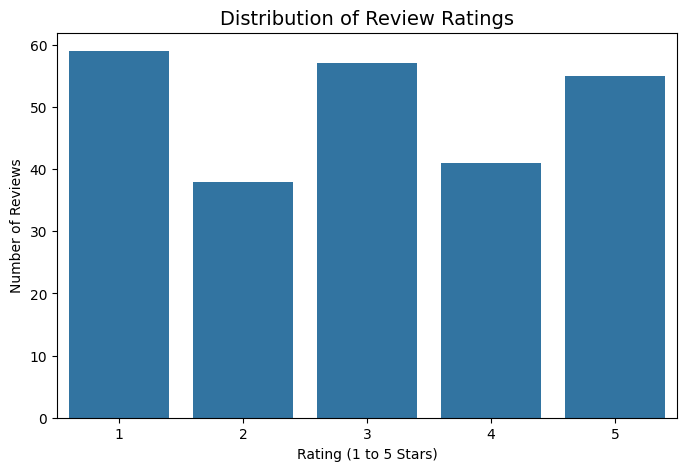

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x=df["rating"])
plt.title("Distribution of Review Ratings", fontsize=14)
plt.xlabel("Rating (1 to 5 Stars)")
plt.ylabel("Number of Reviews")
plt.show()


2. How many reviews were marked as helpful (above a certain threshold)?
Visualization: Thumbs up/down count or pie chart
 Insight: See how much value users find in reviews, e.g., reviews with more than 10 helpful votes.


### Create a Helpful Flag

In [16]:

threshold = 10
df["helpful_flag"] = df["helpful_votes"] > threshold


### Create Helpful Vs Not Helpful

In [17]:
df["helpful_flag"].value_counts()


helpful_flag
True     232
False     18
Name: count, dtype: int64

### 📊 Pie Chart – Helpful vs Not Helpful

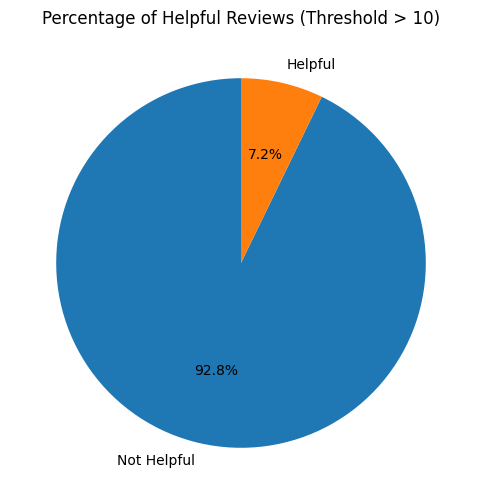

In [18]:
helpful_counts = df["helpful_flag"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(helpful_counts, labels=["Not Helpful", "Helpful"], autopct="%1.1f%%", startangle=90)
plt.title("Percentage of Helpful Reviews (Threshold > 10)")
plt.show()


🧭 3. What are the most common keywords in positive vs. negative reviews?
Visualization: Two Word Clouds (one for 4–5 stars, one for 1–2 stars)
 Insight: Discover what users love or complain about.


### Import WordCloud libraries

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns


### Split Positive & Negative reviews

In [20]:
positive_reviews = df[df["rating"] >= 4]["review"]
negative_reviews = df[df["rating"] <= 2]["review"]


### Convert them into large text blocks

In [21]:
positive_text = " ".join(positive_reviews.astype(str))
negative_text = " ".join(negative_reviews.astype(str))


### Generate WordClouds
### Positive WordCloud

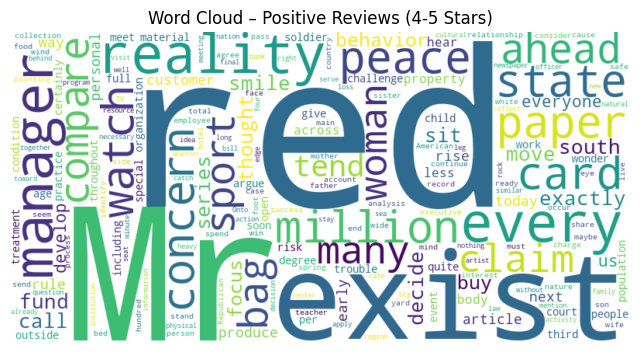

In [22]:
plt.figure(figsize=(8,6))
wc = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(positive_text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – Positive Reviews (4-5 Stars)")
plt.show()


### Negative WordCloud

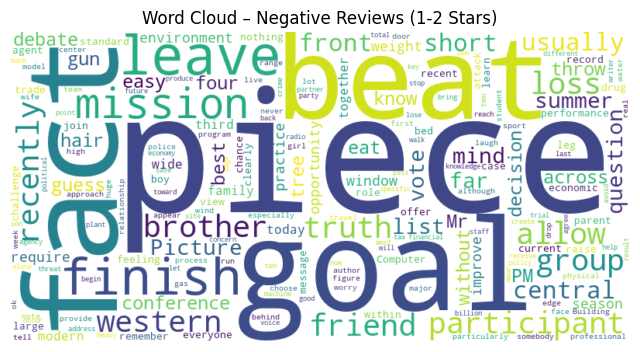

In [23]:
plt.figure(figsize=(8,6))
wc = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(negative_text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – Negative Reviews (1-2 Stars)")
plt.show()


📆 4. How has the average rating changed over time?
Visualization: Line chart with date on x-axis, average rating on y-axis
 Insight: Track user satisfaction over weeks/months.


### Calculate monthly average rating

In [24]:
rating_trend = df.groupby("month")["rating"].mean()
rating_trend


month
2024-01    3.250000
2024-02    4.500000
2024-03    5.000000
2024-04    4.000000
2024-06    2.000000
2024-07    3.250000
2024-08    2.200000
2024-09    2.750000
2025-01    3.600000
2025-02    2.333333
2025-03    2.333333
2025-04    1.000000
2025-05    3.000000
2025-06    3.500000
2025-07    4.500000
2025-08    1.800000
2025-09    4.000000
Freq: M, Name: rating, dtype: float64

### Line Chart

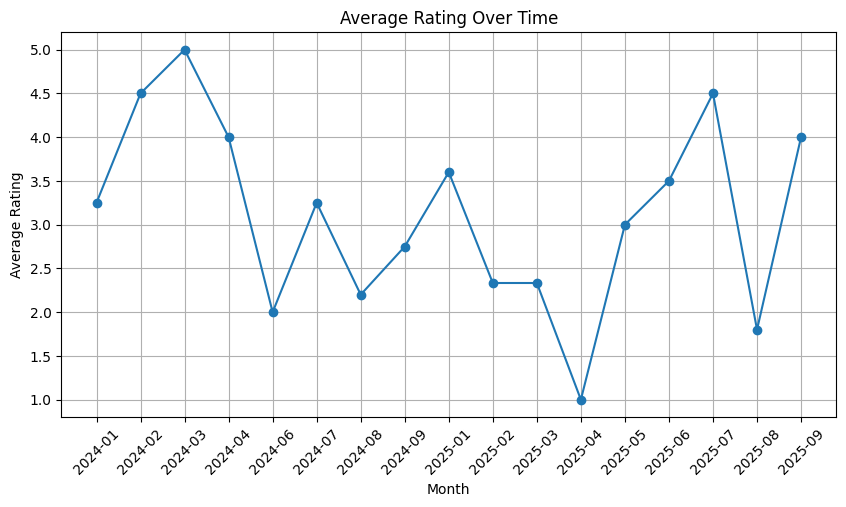

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(rating_trend.index.astype(str), rating_trend.values, marker='o')
plt.title("Average Rating Over Time")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


🌍 5. How do ratings vary by user location?
Visualization: Bar chart or world map
 Insight: Identify regional differences in satisfaction or experience.


### Group by Location

In [26]:
location_ratings = df.groupby("location")["rating"].mean().sort_values(ascending=False)
location_ratings


location
Afghanistan                 5.0
Anguilla                    5.0
Antigua and Barbuda         5.0
Bahrain                     5.0
Belarus                     5.0
                           ... 
Norway                      1.0
Nicaragua                   1.0
New Caledonia               1.0
Vanuatu                     1.0
United States of America    1.0
Name: rating, Length: 157, dtype: float64

### Bar Chart – Average Rating by Location

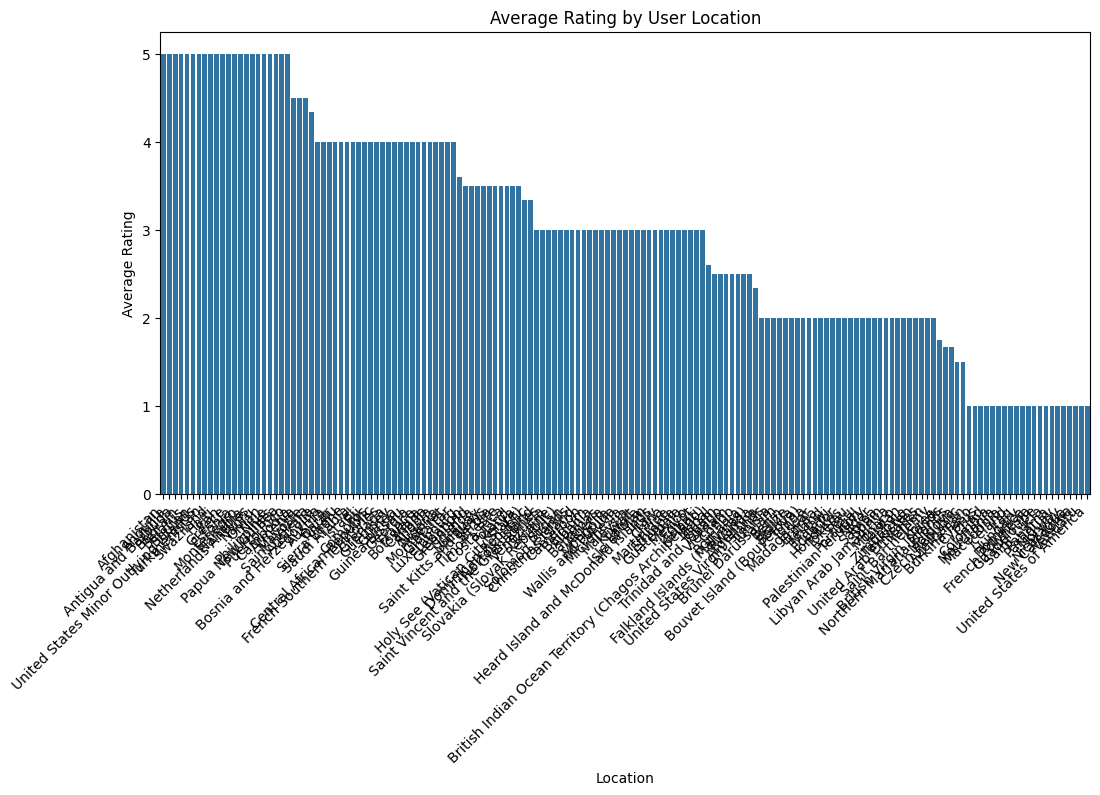

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=location_ratings.index, y=location_ratings.values)
plt.title("Average Rating by User Location")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.show()


🧑‍💻 6. Which platform (Web vs Mobile) gets better reviews?
Visualization: Grouped bar chart comparing average ratings by platform
 Insight: Helps product teams focus improvements.


### Check the unique platforms

In [28]:
df["platform"].unique()


array(['Website', 'Flipkart', 'Amazon', 'Google Play', 'App Store'],
      dtype=object)

### Group by platform

In [29]:
platform_ratings = df.groupby("platform")["rating"].mean().sort_values(ascending=False)
platform_ratings


platform
Flipkart       3.250000
Amazon         3.089286
App Store      3.054545
Website        2.981481
Google Play    2.439024
Name: rating, dtype: float64

### Grouped Bar Chart – Average Rating by Platform

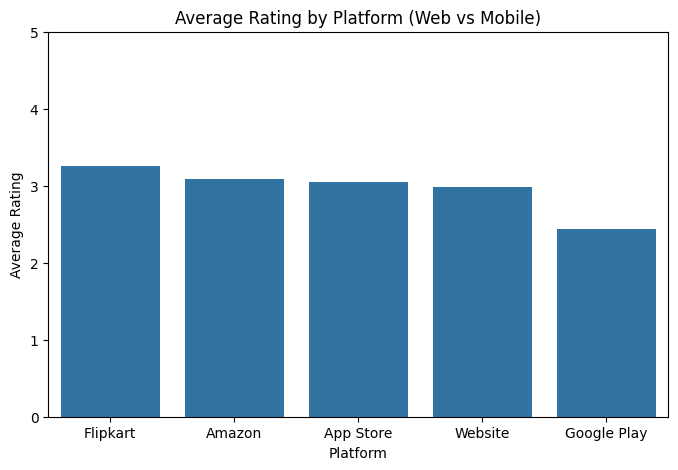

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=platform_ratings.index, y=platform_ratings.values)
plt.title("Average Rating by Platform (Web vs Mobile)")
plt.xlabel("Platform")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.show()


✅❌ 7. Are verified users more satisfied than non-verified ones?
Visualization: Pie chart or side-by-side bar chart comparing rating averages
 Insight: Indicates whether loyal/paying users are happier.


### Check unique values

In [31]:
df["verified_purchase"].unique()


array(['No', 'Yes'], dtype=object)

### Group by verification status

In [32]:
verified_ratings = df.groupby("verified_purchase")["rating"].mean()
verified_ratings


verified_purchase
No     2.955224
Yes    3.008621
Name: rating, dtype: float64

### Pie Chart – Average Rating by Verified Status

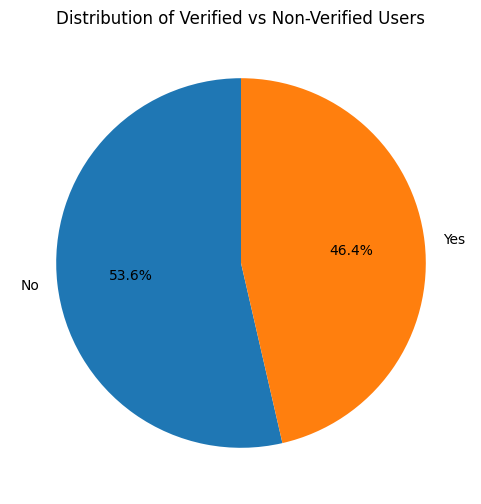

In [33]:
verified_counts = df["verified_purchase"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(verified_counts, labels=verified_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Verified vs Non-Verified Users")
plt.show()


🔠 8. What’s the average length of reviews per rating category?
Visualization: Box plot or bar chart
 Insight: Shows whether people write longer reviews when they're unhappy or very happy.


In [34]:
df["review_length"] = df["review"].astype(str).apply(len)


In [35]:
avg_length = df.groupby("rating")["review_length"].mean().reset_index()
avg_length


,rating,review_length
0,1,134.067797
1,2,147.500000
2,3,134.824561
3,4,135.048780
4,5,139.290909


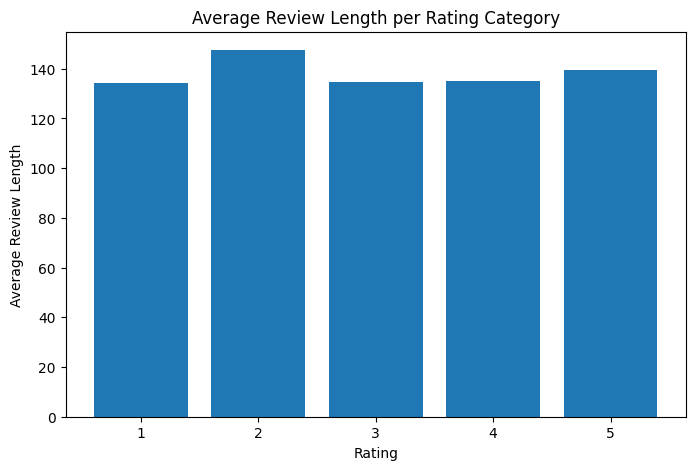

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(avg_length["rating"], avg_length["review_length"])
plt.xlabel("Rating")
plt.ylabel("Average Review Length")
plt.title("Average Review Length per Rating Category")
plt.show()


💬 9. What are the most mentioned words in 1-star reviews?
Visualization: Word cloud or bar chart of top terms
 Insight: Spot recurring issues or complaints.


### Extract all 1-star reviews

In [37]:
one_star_reviews = df[df["rating"] == 1]["review"]


### Combine all 1-star reviews into one big text

In [38]:
text_1star = " ".join(one_star_reviews.astype(str))


### Clean and remove stopwords

In [39]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# remove special chars, convert to lowercase
cleaned_text = re.sub(r"[^a-zA-Z ]", " ", text_1star).lower()

# remove stopwords
cleaned_words = " ".join([w for w in cleaned_text.split() if w not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vignesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Generate Word Cloud

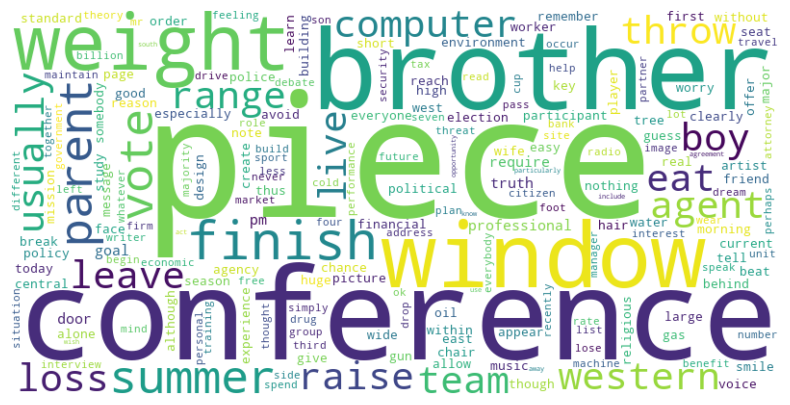

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


📱🧪 10. What ChatGPT version received the highest average rating?
Visualization: Bar chart (version vs. average rating)
 Insight: Evaluate improvement or regression across updates.


In [41]:
avg_rating_version = df.groupby("version")["rating"].mean().reset_index()


In [42]:
avg_rating_version["version_num"] = avg_rating_version["version"].str.replace(".", "").astype(int)
avg_rating_version = avg_rating_version.sort_values("version_num")


In [43]:
import plotly.express as px

fig = px.bar(
    avg_rating_version,
    x="version",
    y="rating",
    title="Average Rating by ChatGPT Version",
    labels={"version": "Version", "rating": "Avg Rating"},
)

fig.show(renderer="browser")   # Opens chart in browser → No Jupyter issues


### Drop Unwanted Columns

In [44]:
columns_to_drop = ["username"]   
df = df.drop(columns=columns_to_drop, errors="ignore")


### Create Target Column (Positive / Negative / Neutral)

In [45]:
def label_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df["sentiment"] = df["rating"].apply(label_sentiment)


### Check the distribution

In [46]:
df["sentiment"].value_counts()


sentiment
Negative    97
Positive    96
Neutral     57
Name: count, dtype: int64

### Handle Missing Values

In [47]:
df["review"] = df["review"].astype(str)
df = df.dropna(subset=["review"])


### TEXT PREPROCESSING PIPELINE

### Define cleaning functions

In [48]:
import re
import emoji

def lowercase(text):
    return text.lower()

def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

def remove_mail(text):
    return re.sub(r'\S+@\S+', '', text)

def remove_html(text):
    return re.sub(r'<.*?>', '', text)

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()


### Apply full cleaning

In [49]:
def clean_text(text):
    text = lowercase(text)
    text = remove_urls(text)
    text = remove_mail(text)
    text = remove_html(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = remove_emoji(text)
    text = remove_whitespace(text)
    return text


In [50]:
df["cleaned_review"] = df["review"].apply(clean_text)


### Tokenization + Lemmatization + Stopwords

### Install needed Packages

In [51]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vignesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Vignesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vignesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vignesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vignesh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Define tokenization + stopwords + lemmatizer

In [52]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def tokenize_lemmatize(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)


In [53]:
df["final_text"] = df["cleaned_review"].apply(tokenize_lemmatize)


### Save to CSV File

In [54]:

df.to_csv("final_processed_reviews.csv", index=False)


### Separate Features (X) and Target (y)

In [55]:
X = df["final_text"]
y = df["sentiment"]


In [56]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


### Train/Test Split

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Pipeline with TF-IDF + Naive Bayes

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])


### Train Model

In [59]:
nb_pipeline.fit(X_train, y_train)


,steps,"[('tfidf', ...), ('nb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


### Evaluate Model

In [60]:
from sklearn.metrics import classification_report

y_pred = nb_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.50      0.48      0.49        23
     Neutral       0.00      0.00      0.00         9
    Positive       0.32      0.50      0.39        18

    accuracy                           0.40        50
   macro avg       0.27      0.33      0.29        50
weighted avg       0.35      0.40      0.37        50



c:\Users\Vignesh\Downloads\New folder\Sentiment_Analysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Vignesh\Downloads\New folder\Sentiment_Analysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Vignesh\Downloads\New folder\Sentiment_Analysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [61]:
df['sentiment'].value_counts()


sentiment
Negative    97
Positive    96
Neutral     57
Name: count, dtype: int64

###   Logistic Regression with class weights.

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression(class_weight='balanced', max_iter=200))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.53      0.43      0.48        23
     Neutral       0.08      0.11      0.09         9
    Positive       0.28      0.28      0.28        18

    accuracy                           0.32        50
   macro avg       0.29      0.27      0.28        50
weighted avg       0.36      0.32      0.34        50



In [63]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression(class_weight='balanced', max_iter=300))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.53      0.43      0.48        23
     Neutral       0.08      0.11      0.09         9
    Positive       0.28      0.28      0.28        18

    accuracy                           0.32        50
   macro avg       0.29      0.27      0.28        50
weighted avg       0.36      0.32      0.34        50



In [64]:
import pickle

# Save trained model
pickle.dump(nb_pipeline, open("model.pkl", "wb"))

# Save TF-IDF vectorizer separately
pickle.dump(nb_pipeline.named_steps['tfidf'], open("tfidf.pkl", "wb"))

print("Model and TF-IDF saved successfully!")


Model and TF-IDF saved successfully!
